In [103]:
import pandas as pd
import numpy as np
from scipy import stats
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [2]:

df=pd.read_csv('../data/clean/df_exp2.csv')
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,status
0,ALDI,2018-01-11,Store Assistant,"Current Employee, more than 1 year","Market Harborough, England, England",1,1.0,3.0,5.0,1.0,4.0,2.0,x,o,v,Cannot WAIT to hand in my resignation!,"Good pay for role, decent benefits package, n...",**THIS IS SPECIFIC TO MKT H'BRO STORE - I s...,2018,C
1,ALDI,2018-01-12,Deputy Manager,"Current Employee, more than 5 years","Tamworth, England, England",4,3.0,4.0,5.0,2.0,3.0,2.0,v,r,r,Deputy manager,good company to work for very addaptable for p...,dont push for progression for everyone,2018,C
2,ALDI,2018-01-28,Store Manager,"Current Employee, more than 5 years","Ellesmere Port, England, England",4,1.0,5.0,5.0,5.0,4.0,1.0,v,v,v,It WILL make you or break you,Huge amount of responsibility\r\nFree rain to ...,Little to no support from AM’s once the going ...,2018,C
3,ALDI,2018-01-30,Store Assistant,"Former Employee, more than 1 year","Crewe, England, England",4,5.0,4.0,5.0,4.0,4.0,3.0,v,r,v,Store Assistant,Good pay and flexible working when part time,The work is very physically demanding,2018,F
4,ALDI,2018-02-01,Deputy Manager,"Current Employee, more than 8 years","Stafford, England, England",2,1.0,1.0,5.0,2.0,3.0,1.0,o,r,x,Deputy manager. With 9 years experience,As a company aldi are good to work for. The pa...,In store it’s vile. I’ve worked in quite a few...,2018,C


In [3]:
df.shape

(458058, 20)

In [4]:
df=df.drop(['date_review','current'], axis=1)

In [5]:
df.shape

(458058, 18)

In [6]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [7]:
df_num.head()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,year
0,1,1.0,3.0,5.0,1.0,4.0,2.0,2018
1,4,3.0,4.0,5.0,2.0,3.0,2.0,2018
2,4,1.0,5.0,5.0,5.0,4.0,1.0,2018
3,4,5.0,4.0,5.0,4.0,4.0,3.0,2018
4,2,1.0,1.0,5.0,2.0,3.0,1.0,2018


In [8]:
df_cat.head()

,firm,job_title,location,recommend,ceo_approv,outlook,headline,pros,cons,status
0,ALDI,Store Assistant,"Market Harborough, England, England",x,o,v,Cannot WAIT to hand in my resignation!,"Good pay for role, decent benefits package, n...",**THIS IS SPECIFIC TO MKT H'BRO STORE - I s...,C
1,ALDI,Deputy Manager,"Tamworth, England, England",v,r,r,Deputy manager,good company to work for very addaptable for p...,dont push for progression for everyone,C
2,ALDI,Store Manager,"Ellesmere Port, England, England",v,v,v,It WILL make you or break you,Huge amount of responsibility\r\nFree rain to ...,Little to no support from AM’s once the going ...,C
3,ALDI,Store Assistant,"Crewe, England, England",v,r,v,Store Assistant,Good pay and flexible working when part time,The work is very physically demanding,F
4,ALDI,Deputy Manager,"Stafford, England, England",o,r,x,Deputy manager. With 9 years experience,As a company aldi are good to work for. The pa...,In store it’s vile. I’ve worked in quite a few...,C


In [9]:
#df_num_cat=df_num[['overall_rating','work_life_balance','culture_values','diversity_inclusion','career_opp','comp_benefits','senior_mgmt']].astype('object')

In [10]:
df_num['overall_rating'].value_counts()

4    151713
5    146546
3     97495
2     33411
1     28893
Name: overall_rating, dtype: int64

### Plotting the distribution of the 'attributtes' (numerical)

<AxesSubplot:xlabel='work_life_balance', ylabel='count'>

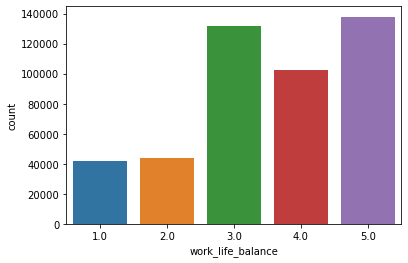

In [11]:
sns.countplot(x=df_num["work_life_balance"])

<AxesSubplot:xlabel='culture_values', ylabel='count'>

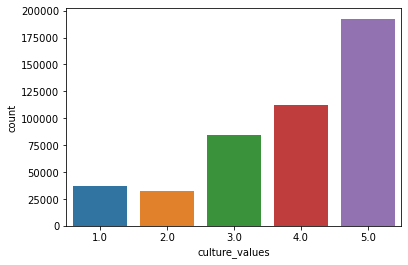

In [12]:
sns.countplot(x=df_num["culture_values"])

<AxesSubplot:xlabel='diversity_inclusion', ylabel='count'>

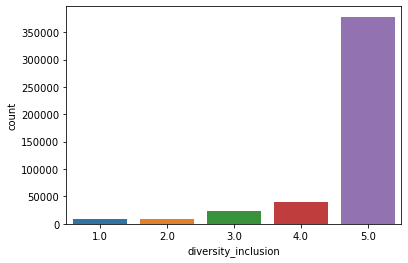

In [13]:
sns.countplot(x=df_num["diversity_inclusion"])

<AxesSubplot:xlabel='career_opp', ylabel='count'>

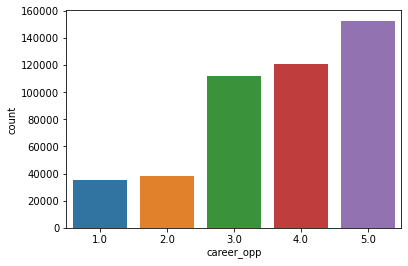

In [14]:
sns.countplot(x=df_num["career_opp"])

<AxesSubplot:xlabel='comp_benefits', ylabel='count'>

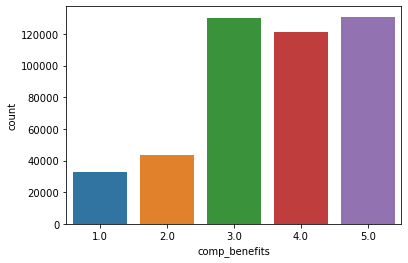

In [15]:
sns.countplot(x=df_num["comp_benefits"])

<AxesSubplot:xlabel='senior_mgmt', ylabel='count'>

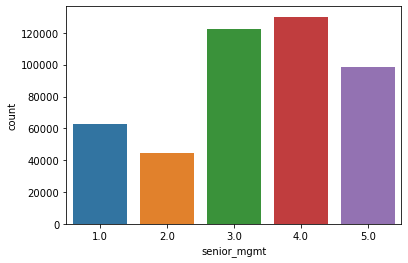

In [16]:
sns.countplot(x=df_num["senior_mgmt"])

<AxesSubplot:xlabel='overall_rating', ylabel='count'>

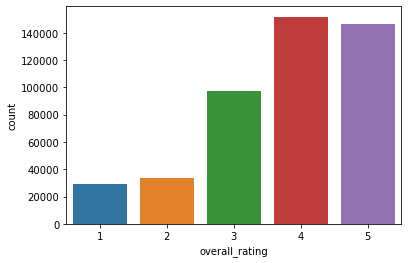

In [17]:
sns.countplot(x=df_num["overall_rating"])

<AxesSubplot:xlabel='year', ylabel='count'>

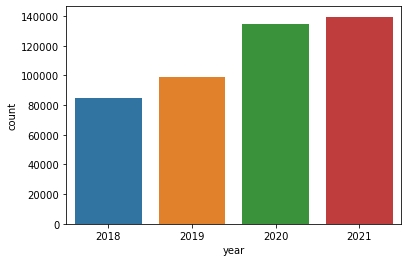

In [18]:
sns.countplot(x=df_num["year"])

<AxesSubplot:xlabel='diversity_inclusion', ylabel='count'>

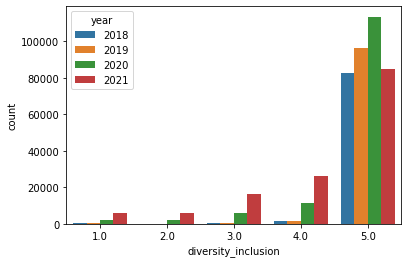

In [19]:
sns.countplot(data=df_num, x="diversity_inclusion", hue="year")

In [20]:
correlations_matrix = df_num.corr()
correlations_matrix

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,year
overall_rating,1.000000,0.505030,0.666696,0.258149,0.622323,0.544748,0.648367,0.067458
work_life_balance,0.505030,1.000000,0.554711,0.255433,0.389629,0.436728,0.507006,0.042222
culture_values,0.666696,0.554711,1.000000,0.346998,0.656353,0.588020,0.714100,0.087095
diversity_inclusion,0.258149,0.255433,0.346998,1.000000,0.261421,0.247638,0.267477,-0.329071
career_opp,0.622323,0.389629,0.656353,0.261421,1.000000,0.626635,0.668777,0.088081
comp_benefits,0.544748,0.436728,0.588020,0.247638,0.626635,1.000000,0.581400,0.096146
senior_mgmt,0.648367,0.507006,0.714100,0.267477,0.668777,0.581400,1.000000,0.082822
year,0.067458,0.042222,0.087095,-0.329071,0.088081,0.096146,0.082822,1.000000


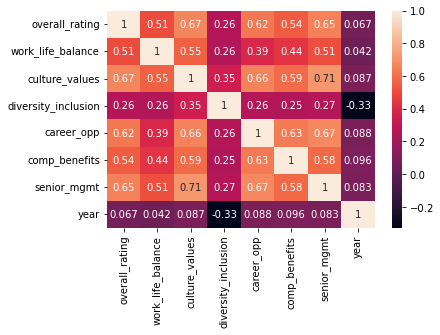

In [21]:
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

Class imbalance - upsample

In [58]:
overall_rating_1=df[df['overall_rating'] ==1]
overall_rating_2=df[df['overall_rating'] ==2]
overall_rating_3=df[df['overall_rating'] ==3]
overall_rating_4=df[df['overall_rating'] ==4]
overall_rating_5=df[df['overall_rating'] ==5]

overall_rating_2_upsample=resample(overall_rating_2, 
                                   replace=True,
                                   n_samples = len(overall_rating_5))

overall_rating_1_upsample=resample(overall_rating_1, 
                                   replace=True,
                                   n_samples = len(overall_rating_5))

overall_rating_3_upsample=resample(overall_rating_3, 
                                   replace=True,
                                   n_samples = len(overall_rating_5))

display(overall_rating_2.shape)
display(overall_rating_5.shape)
display(overall_rating_2_upsample.shape)
display(overall_rating_1_upsample.shape)
display(overall_rating_3_upsample.shape)

(33411, 18)

(146546, 18)

(146546, 18)

(146546, 18)

(146546, 18)

In [63]:
df_upsample=pd.concat([overall_rating_2_upsample,overall_rating_1_upsample,overall_rating_3_upsample,overall_rating_4,overall_rating_5])

In [64]:
df_upsample

,firm,job_title,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,status
265695,EY,Assistant Director,"Dublin, Dublin",2,2.0,3.0,5.0,3.0,2.0,1.0,x,o,r,OK if you're a partner,you get to work with a variety of clients,compensation is skewed towards partners,2021,C
55788,EY,Audit Senior,"Dublin, Dublin",2,1.0,3.0,5.0,5.0,2.0,3.0,v,r,o,Audit Senior at EY,A lot of annual leave 22 days (Optional 5 extr...,No payment for overtime beyond 80 hours cap (8...,2019,C
28505,CBRE,Anonymous Employee,"Sunnyvale, CA",2,3.0,4.0,5.0,3.0,1.0,1.0,x,o,o,"Opportunities to grow career, but management i...","Able to work for great clients, such as Google...",Salary is very low and higher management does ...,2019,C
42731,Deloitte,Business Technology Analyst,Bangalore,2,3.0,4.0,5.0,1.0,4.0,4.0,x,v,x,Worst place to start your career,co-workers are generally very helpful.,Not a place to start your career. Management d...,2019,C
3096,American-Express,Anonymous Employee,"Gurgaon, Haryana, Haryana",2,1.0,1.0,5.0,3.0,3.0,1.0,x,o,o,Assistant manager,Work from home-young crowd-parties-good career...,Too much of work- data issues - too aggressive...,2018,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458047,the-LEGO-Group,User Experience Designer,Billund,5,3.0,4.0,4.0,5.0,5.0,3.0,o,o,o,An Amazing Workplace,Lots of resources and room for growth,Sometimes big organizations like this have ver...,2021,C
458052,the-LEGO-Group,Senior Experience Designer,Billund,5,5.0,5.0,5.0,5.0,5.0,5.0,v,v,v,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important....",2021,C
458053,the-LEGO-Group,Marketing Manager,"München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations,2021,C
458056,the-LEGO-Group,Customer Service Representative,No location,5,5.0,5.0,5.0,5.0,5.0,5.0,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ...",2021,C


In [65]:
df_upsample['overall_rating'].value_counts()

4    151713
2    146546
1    146546
3    146546
5    146546
Name: overall_rating, dtype: int64

In [66]:
df_upsample['year'] = df_upsample[['year']].astype('object')

In [67]:
df_upsample_num = df_upsample.select_dtypes(['number'])
df_upsample_num.head()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
265695,2,2.0,3.0,5.0,3.0,2.0,1.0
55788,2,1.0,3.0,5.0,5.0,2.0,3.0
28505,2,3.0,4.0,5.0,3.0,1.0,1.0
42731,2,3.0,4.0,5.0,1.0,4.0,4.0
3096,2,1.0,1.0,5.0,3.0,3.0,1.0


### Split x/y

In [68]:
y=df_upsample_num['overall_rating']
X=df_upsample_num.drop(['overall_rating'], axis=1)

### Train/Test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [70]:
X_train_num= X_train[['work_life_balance','culture_values','diversity_inclusion','career_opp','comp_benefits','senior_mgmt']]
X_test_num= X_test[['work_life_balance','culture_values','diversity_inclusion','career_opp','comp_benefits','senior_mgmt']]

In [80]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial')

classification.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0, solver='saga')

In [81]:
X_train.head()

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
322591,3.0,3.0,4.0,3.0,2.0,1.0
181696,5.0,4.0,5.0,4.0,5.0,4.0
400043,3.0,1.0,1.0,1.0,1.0,1.0
364095,3.0,2.0,3.0,3.0,2.0,4.0
372600,5.0,5.0,5.0,5.0,5.0,5.0


In [82]:
X_test.head()

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
301058,1.0,1.0,5.0,1.0,3.0,1.0
249759,3.0,5.0,5.0,5.0,5.0,4.0
365297,3.0,3.0,5.0,3.0,3.0,3.0
369994,3.0,5.0,5.0,4.0,5.0,5.0
139598,3.0,4.0,5.0,3.0,2.0,4.0


In [83]:
#Now we  can predict:
y_test_pred= classification.predict(X_test)

In [84]:
print(accuracy_score(y_test, y_test_pred))
classification.score(X_test, y_test)

0.5252608754573791


0.5252608754573791

In [85]:
confusion_matrix(y_test, y_test_pred)

array([[21350,  3285,  2098,   996,  1566],
       [11780,  9419,  4699,  1558,  1759],
       [ 2142,  6643, 11782,  5482,  3255],
       [  215,  1244,  6587, 13715,  8536],
       [  122,   420,  2027,  5648, 21252]], dtype=int64)

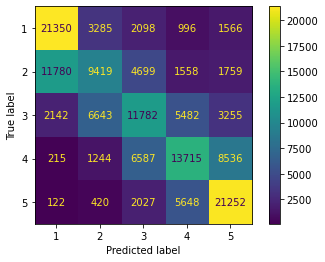

In [86]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

In [87]:
cohen_kappa_score(y_test, y_test_pred)

0.40658527259132515

In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.60      0.73      0.66     29295
           2       0.45      0.32      0.38     29215
           3       0.43      0.40      0.42     29304
           4       0.50      0.45      0.48     30297
           5       0.58      0.72      0.65     29469

    accuracy                           0.53    147580
   macro avg       0.51      0.53      0.51    147580
weighted avg       0.51      0.53      0.51    147580



decision tree

In [90]:
regr = DecisionTreeRegressor(max_depth=5)
model = regr.fit(X_train, y_train)

In [91]:
print("Train data R2 was: {:.2f} ".format(regr.score(X_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(X_test, y_test)))

Train data R2 was: 0.60 
Test data R2 was: 0.60


In [92]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)
regr.fit(X_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(X_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(X_test, y_test)))

Train data R2 was: 0.63
Test data R2 was: 0.63


In [93]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=10,
                             min_samples_leaf = 10,
                             max_features = 3)
regr.fit(X_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(X_train, y_train)))
print("test data R2 was: {:.2f}".format(regr.score(X_test, y_test)))

Train data R2 was: 0.63
test data R2 was: 0.63


In [94]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)

In [96]:
results = cross_validate(regr,X_train, y_train, cv = 5) # We always do the CV on the TRAIN set. cv = K

In [97]:
results

{'fit_time': array([0.62956405, 0.52867794, 0.52430058, 0.61961198, 0.55439258]),
 'score_time': array([0.01629615, 0.01247668, 0.01411271, 0.01376295, 0.0134201 ]),
 'test_score': array([0.62749773, 0.62823242, 0.62827305, 0.62791385, 0.62152949])}

In [98]:
print(results['test_score'])
print("The average R2 over the folds is: {:.2f}".format(results['test_score'].mean()))
print("The standard deviation of R2 over the folds is: {:.2f}".format(results['test_score'].std()))

[0.62749773 0.62823242 0.62827305 0.62791385 0.62152949]
The average R2 over the folds is: 0.63
The standard deviation of R2 over the folds is: 0.00


In [99]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=10,
                             min_samples_leaf = 10,
                             max_features = 3)

In [100]:
results = cross_validate(regr,X_train, y_train, cv = 5)
print(results['test_score'])
print("The average R2 over the folds is: {:.2f}".format(results['test_score'].mean()))
print("The standard deviation of R2 over the folds is: {:.2f}".format(results['test_score'].std()))

[0.62492024 0.62631689 0.62572049 0.6238763  0.61640419]
The average R2 over the folds is: 0.62
The standard deviation of R2 over the folds is: 0.00


In [101]:
regr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features=3, min_samples_leaf=10,
                      min_samples_split=10)

### clusters

In [ ]:
p = sns.scatterplot(data=df, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

0. Deal with class imbalance
1. X-y
2. Train test split 
3. hot encode categoricals train and test - x
4. standard scarler train and test - x
5. concat train encoded and scaled -x
6. concat test encoded and scaled -x
7. create model and get predictions 